In [219]:
import pykoop
from sklearn.preprocessing import MaxAbsScaler, StandardScaler
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from scipy.integrate import odeint
import seaborn as sns
import sklearn
import pysindy as ps
from sklearn.linear_model import Lasso
from tools import plot_main, plot_clustered_kuramoto, generate_kuramoto_cluster_data_sin_cos

# 数据生成

In [259]:
N=3
n_clusters=1  # 团数
K_intra=5
K_inter=0.1
noise=0
dt=0.01

In [116]:
# 多时间序列采样
T=1
batch = 10000
t_list = []
x_data = []
for seed in range(batch):
    x_train, theta_hist, t, K_matrix = generate_kuramoto_cluster_data_sin_cos(
        N=N, n_clusters=n_clusters, K_intra=K_intra, K_inter=K_inter, dt=dt, T=T, noise=noise, random_state=seed
    )
    x_data.append(x_train)
    t_list.append(t)

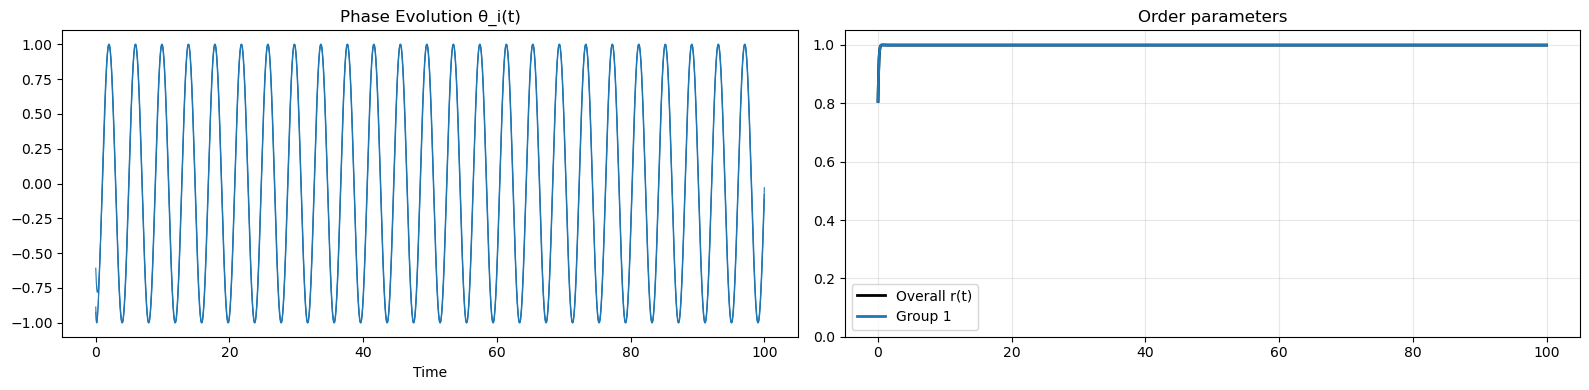

In [260]:
# 单时间序列采样
X_embed, theta_hist, t, K_matrix = plot_clustered_kuramoto(
    N=N,          # 振子数
    n_clusters=n_clusters,  # 团数
    K_intra=K_intra,   # 团内耦合
    K_inter=K_inter,   # 团间耦合
    noise=noise,
    T=100,
    random_state=0,
    dt=dt
)

x_data = X_embed


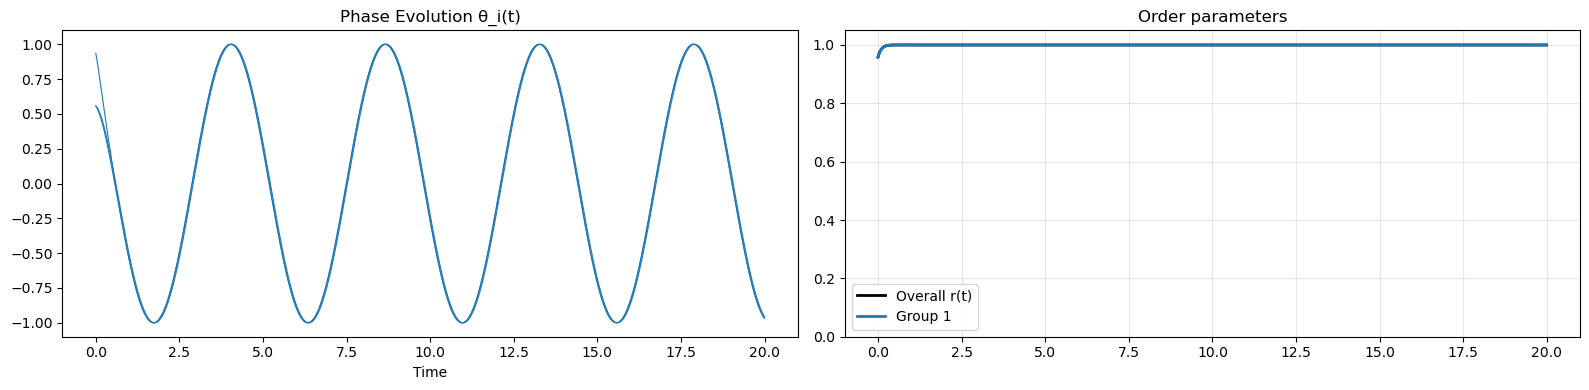

In [261]:
# 测试集
X_embed, theta_hist, t, K_matrix = plot_clustered_kuramoto(
    N=N,          # 振子数
    n_clusters=n_clusters,  # 团数
    K_intra=K_intra,   # 团内耦合
    K_inter=K_inter,   # 团间耦合
    noise=noise,
    T=20,
    random_state=42,
    dt=dt
)

x_test = X_embed

# SINDy

In [207]:
sr3_optimizer = ps.SR3(reg_weight_lam=0.1, regularizer="l1")
ode_lib = ps.PolynomialLibrary(degree=1,include_bias=True)
identity_library = ps.IdentityLibrary()
model = ps.SINDy(feature_library=ode_lib, optimizer=sr3_optimizer, discrete_time=True)
model.fit(x_data, t=dt)
model.print()

(x0)[k+1] = 0.890 x0[k]
(x1)[k+1] = 0.888 x1[k]
(x2)[k+1] = 0.883 x2[k]
(x3)[k+1] = 0.883 x3[k]
(x4)[k+1] = 0.880 x4[k]
(x5)[k+1] = 0.882 x5[k]
(x6)[k+1] = 0.880 x6[k]
(x7)[k+1] = 0.881 x7[k]
(x8)[k+1] = 0.886 x8[k]
(x9)[k+1] = 0.878 x9[k]
(x10)[k+1] = 0.886 x10[k]
(x11)[k+1] = 0.883 x11[k]
(x12)[k+1] = 0.887 x12[k]
(x13)[k+1] = 0.883 x13[k]
(x14)[k+1] = 0.881 x14[k]
(x15)[k+1] = 0.883 x15[k]
(x16)[k+1] = 0.880 x16[k]
(x17)[k+1] = 0.883 x17[k]
(x18)[k+1] = 0.881 x18[k]
(x19)[k+1] = 0.881 x19[k]
(x20)[k+1] = 0.881 x20[k]
(x21)[k+1] = 0.881 x21[k]
(x22)[k+1] = 0.886 x22[k]
(x23)[k+1] = 0.881 x23[k]


In [262]:
sr3_optimizer = ps.SR3(reg_weight_lam=0.1, regularizer="l1")
lasso_optimizer = Lasso(alpha=0.01, max_iter=2000, fit_intercept=False)

fourier_library = ps.FourierLibrary(n_frequencies=1)
identity_library = ps.IdentityLibrary()
library = identity_library + fourier_library
library_functions = [
    lambda x: x,
    lambda x: np.sin(x),
    lambda x: np.cos(x),
]
custom_library = ps.CustomLibrary(library_functions=library_functions)
ode_lib = ps.PolynomialLibrary(degree=1,include_bias=True)

model = ps.SINDy(feature_library=fourier_library, optimizer=sr3_optimizer, discrete_time=False)
model.fit(x_data, t=dt)
model.print()

(x0)' = 8.401 sin(1 x0) + -3.155 cos(1 x0) + -0.209 sin(1 x1) + -5.151 cos(1 x1) + -8.094 sin(1 x2) + 8.430 cos(1 x2) + 0.445 sin(1 x3) + -8.765 cos(1 x3) + 2.772 sin(1 x4) + -12.754 cos(1 x4) + -4.684 sin(1 x5) + 21.595 cos(1 x5)
(x1)' = 5.498 sin(1 x0) + -3.865 sin(1 x1) + -1.449 sin(1 x2) + -1.173 cos(1 x3) + 0.348 sin(1 x4) + -1.672 cos(1 x4) + -1.753 sin(1 x5) + 2.940 cos(1 x5)
(x2)' = 8.421 sin(1 x0) + -1.578 cos(1 x0) + -0.123 sin(1 x1) + -2.933 cos(1 x1) + -8.132 sin(1 x2) + 4.629 cos(1 x2) + 0.133 sin(1 x3) + -5.599 cos(1 x3) + 1.749 sin(1 x4) + -8.379 cos(1 x4) + -3.354 sin(1 x5) + 14.061 cos(1 x5)
(x3)' = 0.930 sin(1 x0) + 3.572 cos(1 x0) + 0.188 sin(1 x1) + 5.770 cos(1 x1) + -9.453 cos(1 x2) + 9.610 sin(1 x3) + 6.278 cos(1 x3) + 1.752 sin(1 x4) + 9.462 cos(1 x4) + -11.497 sin(1 x5) + -15.828 cos(1 x5)
(x4)' = 0.031 sin(1 x0) + -3.086 cos(1 x0) + -5.064 cos(1 x1) + 1.077 sin(1 x2) + 8.273 cos(1 x2) + 8.412 sin(1 x3) + -8.453 cos(1 x3) + -12.339 cos(1 x4) + -8.412 sin(1 x5) +

/opt/anaconda3/envs/py311/lib/python3.11/site-packages/pysindy/optimizers/sr3.py:374: ConvergenceWarning: SR3 did not converge after 30 iterations.
  warnings.warn(


In [263]:
model.score(x_data, t=dt), model.score(x_test, t=dt)

(0.9680404047164929, 0.8361983420608005)

(6, 12)


<Axes: >

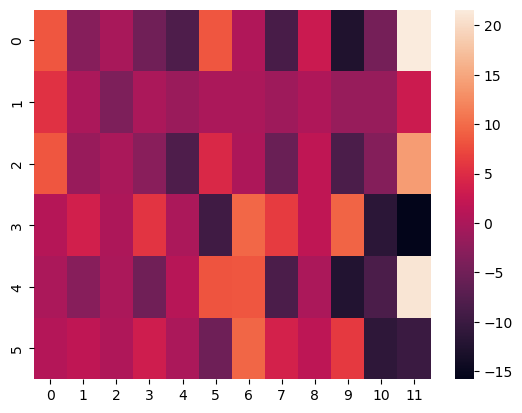

In [264]:
A = model.coefficients()
print(A.shape)
sns.heatmap(model.coefficients())

# 预测

/var/folders/mw/53dhwskj4zq47dtls4lhht4m0000gn/T/ipykernel_99108/2335028362.py:9: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show()


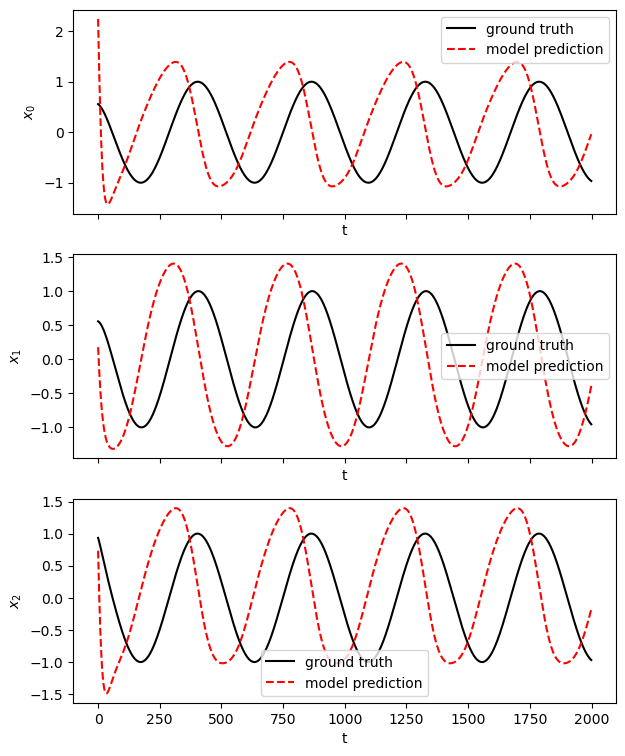

In [265]:
X_test_predicted = model.predict(x_test)

fig, axs = plt.subplots(3, 1, sharex=True, figsize=(7, 9))
for i in range(3):
    axs[i].plot(x_test[:, i], "k", label="ground truth")
    axs[i].plot(X_test_predicted[:, i], "r--", label="model prediction")
    axs[i].legend()
    axs[i].set(xlabel="t", ylabel=r"$x_{}$".format(i))
fig.show()

/var/folders/mw/53dhwskj4zq47dtls4lhht4m0000gn/T/ipykernel_99108/3992773199.py:10: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show()


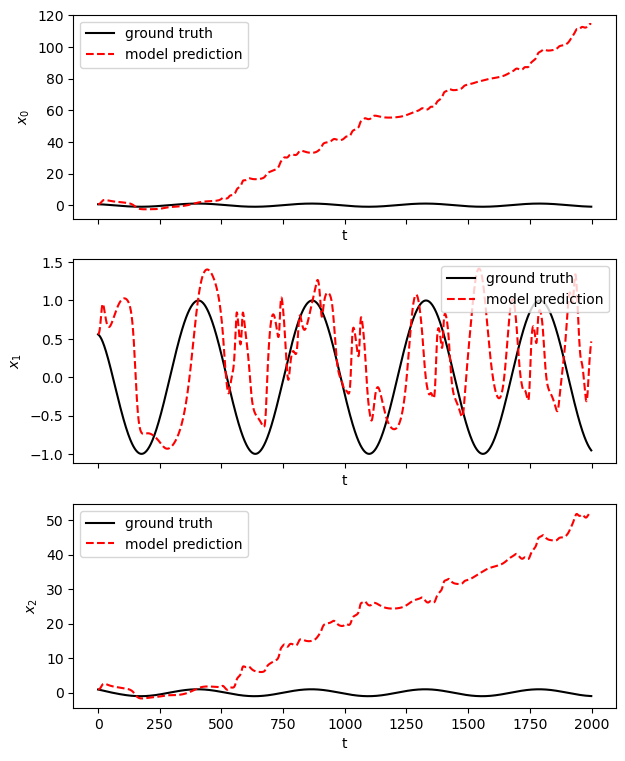

In [266]:
init_data = x_test[0,:]
X_test_predicted = model.simulate(init_data,t) #len(x_test)-1

fig, axs = plt.subplots(3, 1, sharex=True, figsize=(7, 9))
for i in range(3):
    axs[i].plot(x_test[:, i], "k", label="ground truth")
    axs[i].plot(X_test_predicted[:, i], "r--", label="model prediction")
    axs[i].legend()
    axs[i].set(xlabel="t", ylabel=r"$x_{}$".format(i))
fig.show()

# 矩阵稀疏性

In [202]:
from tools import matrix_l0_norm_corrected, matrix_l1_norm_manual
matrix_l1_norm_manual(A.T)

np.float64(1.3760317847018555)

In [203]:
matrix_l0_norm_corrected(A.T,0.0)

7

# 特征谱与SVD分析

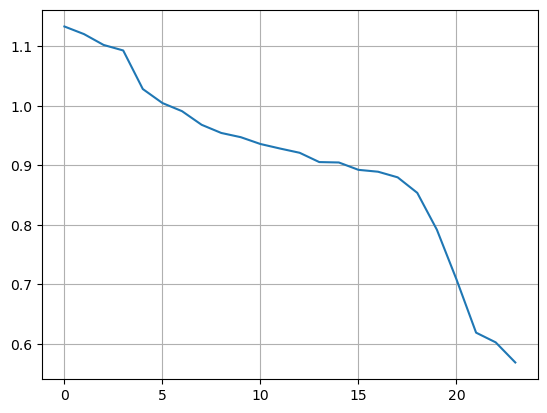

[1.13354742 1.12074251 1.1024983  1.09322336 1.02840718 1.00486833]


In [204]:
U,S,V = np.linalg.svd(A)
plt.figure()
plt.plot(S)
plt.grid(True)
plt.show()
print(S[:6])

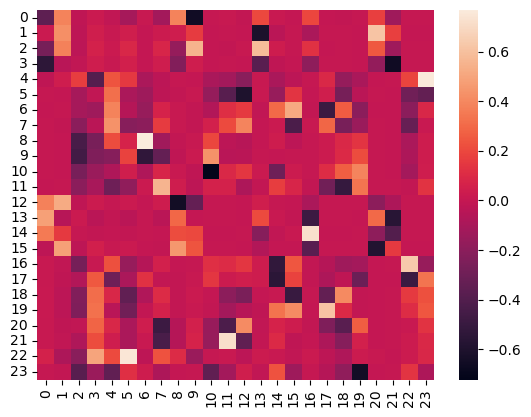

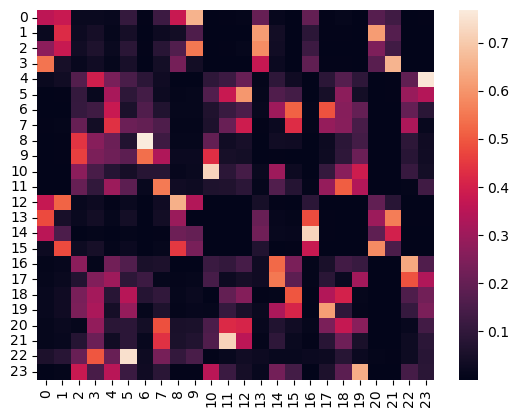

In [205]:
U_abs = np.abs(U)
plt.figure()
sns.heatmap(np.real(U))
plt.show()
plt.figure()
sns.heatmap(U_abs)
plt.show()

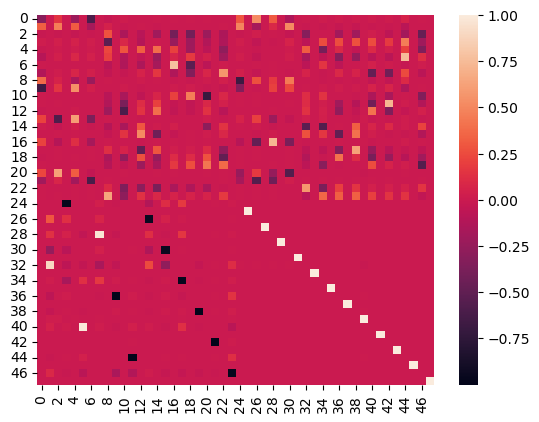

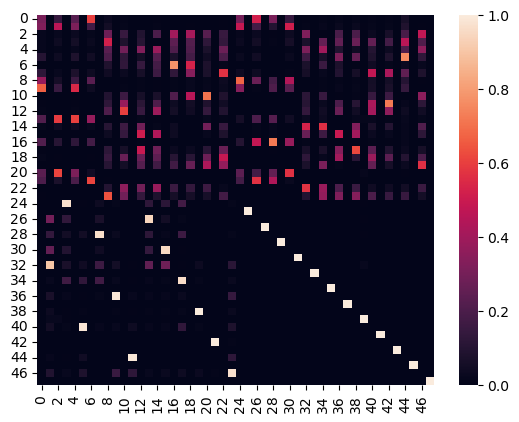

In [206]:
V_abs = np.abs(V)
plt.figure()
sns.heatmap(np.real(V))
plt.show()
plt.figure()
sns.heatmap(V_abs)
plt.show()

# Lorzen

In [213]:
import warnings
from contextlib import contextmanager
from copy import copy
from pathlib import Path

import matplotlib.pyplot as plt
import numpy as np
from scipy.integrate import solve_ivp
from scipy.linalg import LinAlgWarning
from sklearn.exceptions import ConvergenceWarning
from sklearn.linear_model import Lasso

import pysindy as ps
from pysindy.utils import enzyme
from pysindy.utils import lorenz
from pysindy.utils import lorenz_control

if __name__ != "testing":
    t_end_train = 10
    t_end_test = 15
else:
    t_end_train = 0.04
    t_end_test = 0.04

data = (Path() / "../data").resolve()


@contextmanager
def ignore_specific_warnings():
    filters = copy(warnings.filters)
    warnings.filterwarnings("ignore", category=ConvergenceWarning)
    warnings.filterwarnings("ignore", category=LinAlgWarning)
    warnings.filterwarnings("ignore", category=UserWarning)
    yield
    warnings.filters = filters


if __name__ == "testing":
    import sys
    import os

    sys.stdout = open(os.devnull, "w")

In [122]:
np.random.seed(100)
integrator_keywords = {}
integrator_keywords["rtol"] = 1e-12
integrator_keywords["method"] = "LSODA"
integrator_keywords["atol"] = 1e-12

In [267]:
# Generate measurement data
dt = 0.002

t_train = np.arange(0, t_end_train, dt)
x0_train = [-8, 8, 27]
t_train_span = (t_train[0], t_train[-1])
x_train = solve_ivp(
    lorenz, t_train_span, x0_train, t_eval=t_train, **integrator_keywords
).y.T

model = ps.SINDy(discrete_time=False)
model.fit(x_train, t=dt)
model.print()

(x0)' = -9.999 x0 + 9.999 x1
(x1)' = 27.992 x0 + -0.999 x1 + -1.000 x0 x2
(x2)' = -2.666 x2 + 1.000 x0 x1


In [270]:
import scipy
A = model.coefficients()
AA_ = scipy.linalg.expm(A + A.T)
AA_

ValueError: operands could not be broadcast together with shapes (3,10) (10,3) 

In [216]:
t_test = np.arange(0, t_end_test, dt)
x0_test = np.array([8, 7, 15])
t_test_span = (t_test[0], t_test[-1])
x_test = solve_ivp(
    lorenz, t_test_span, x0_test, t_eval=t_test, **integrator_keywords
).y.T

# Compare SINDy-predicted derivatives with finite difference derivatives
print("Model score: %f" % model.score(x_test, t=dt))

Model score: 1.000000


/var/folders/mw/53dhwskj4zq47dtls4lhht4m0000gn/T/ipykernel_99108/2661361613.py:19: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show()


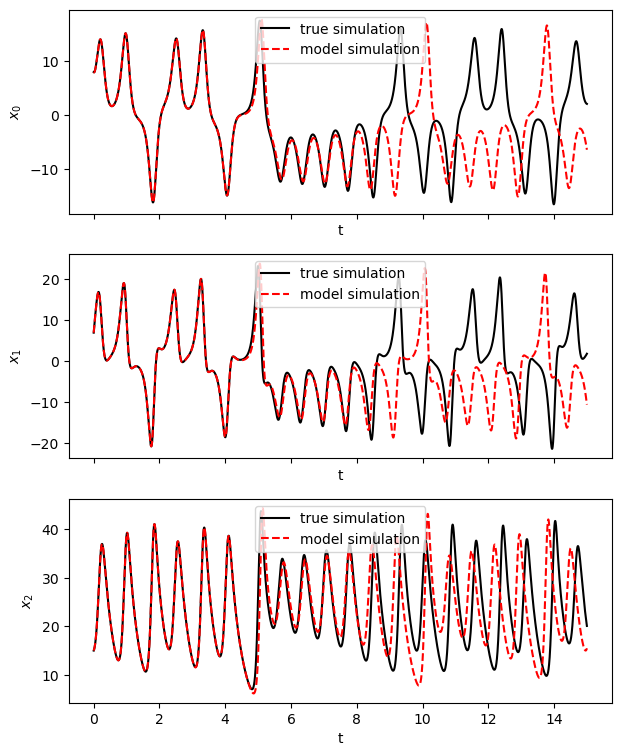

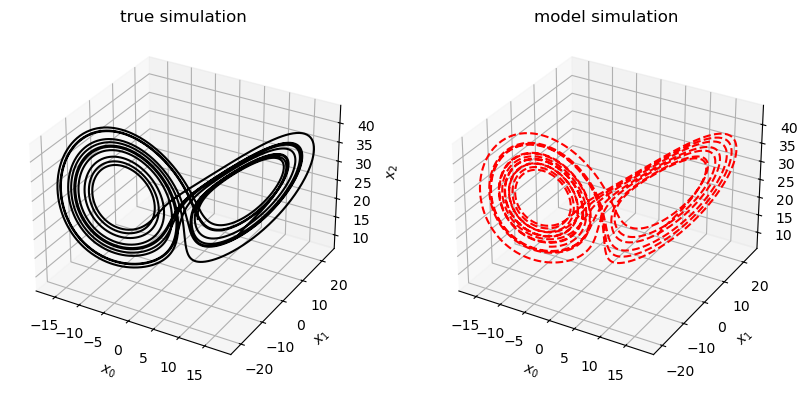

In [217]:
x_test_sim = model.simulate(x0_test, t_test)

fig, axs = plt.subplots(x_test.shape[1], 1, sharex=True, figsize=(7, 9))
for i in range(x_test.shape[1]):
    axs[i].plot(t_test, x_test[:, i], "k", label="true simulation")
    axs[i].plot(t_test, x_test_sim[:, i], "r--", label="model simulation")
    axs[i].legend()
    axs[i].set(xlabel="t", ylabel="$x_{}$".format(i))

fig = plt.figure(figsize=(10, 4.5))
ax1 = fig.add_subplot(121, projection="3d")
ax1.plot(x_test[:, 0], x_test[:, 1], x_test[:, 2], "k")
ax1.set(xlabel="$x_0$", ylabel="$x_1$", zlabel="$x_2$", title="true simulation")

ax2 = fig.add_subplot(122, projection="3d")
ax2.plot(x_test_sim[:, 0], x_test_sim[:, 1], x_test_sim[:, 2], "r--")
ax2.set(xlabel="$x_0$", ylabel="$x_1$", zlabel="$x_2$", title="model simulation")

fig.show()